In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

/var/folders/z5/mf0v461d1f578jlw6kng364r0000gn/T/ipykernel_64931/2938629012.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = pd.read_csv('Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.shape

(200, 5)

In [5]:
print("number if Rows",data.shape[0])
print("Number of Columsn", data.shape[1])

number if Rows 200
Number of Columsn 5


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
print("any missing vlues?", data.isnull().values.any())

any missing vlues? False


In [8]:
data.isnull().sum()

CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

In [9]:
per_missing= data.isnull().sum() * 100/ len(data)
per_missing

CustomerID            0.0
Genre                 0.0
Age                   0.0
Annual_Income_(k$)    0.0
Spending_Score        0.0
dtype: float64

In [10]:
data.dropna(axis=0)

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [11]:
data.describe(include='all')

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


In [12]:
data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual_Income_(k$)', 'Spending_Score'], dtype='object')

## 1.1) K- means clustering over this dataset using Manhattan distance 

In [13]:
X = data[['Age', 'Annual_Income_(k$)', 'Spending_Score']]

scores = []
for k in range(2, 11):
    
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=300)
    kmeans.fit(X)
    # Calculating the silhouette score to evaluate clustering quality
    score = silhouette_score(X, kmeans.labels_, metric='euclidean')  # Default metric is 'euclidean'
    scores.append(score)

optimal_k = np.argmax(scores) + 2 

optimal_k, scores


(6,
 [0.293166070535953,
  0.3839349967742105,
  0.40546302077733304,
  0.44428597560893024,
  0.4523443947724053,
  0.43883522027400007,
  0.43280878015743623,
  0.3982668308742979,
  0.38193498984820856])

In [14]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10, max_iter=300)
kmeans.fit(X)
manhattan_distances = pairwise_distances_argmin_min(X, kmeans.cluster_centers_, metric='manhattan')[1]
cluster_assignments = pd.DataFrame({'Cluster': kmeans.labels_, 'ManhattanDistance': manhattan_distances})

cluster_assignments.head()


,Cluster,ManhattanDistance
0,5,54.761905
1,2,16.636364
2,5,46.809524
3,2,14.363636
4,5,41.761905


# Visualization K-Means Clustering with Manhattan Distance

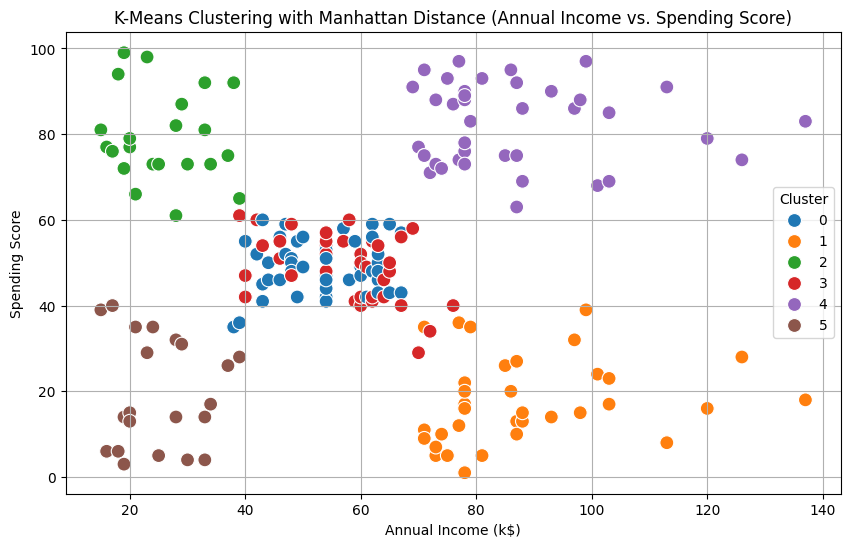

In [15]:
data_with_clusters = pd.concat([X, cluster_assignments['Cluster']], axis=1)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual_Income_(k$)', y='Spending_Score', hue='Cluster', data=data_with_clusters, palette='tab10', s=100)
plt.title('K-Means Clustering with Manhattan Distance (Annual Income vs. Spending Score)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# 1.2) Labels and fill it with cluster number assigned by k-means algorithm

In [16]:
X_new = data[['Age', 'Annual_Income_(k$)', 'Spending_Score']]
kmeans_new = KMeans(n_clusters=optimal_k, random_state=42, n_init=10, max_iter=300)
kmeans_new.fit(X_new)
manhattan_distances_new = pairwise_distances_argmin_min(X_new, kmeans_new.cluster_centers_, metric='manhattan')[1]
data['Labels'] = kmeans_new.labels_
data.head()


,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score,Labels
0,1,Male,19,15,39,5
1,2,Male,21,15,81,2
2,3,Female,20,16,6,5
3,4,Female,23,16,77,2
4,5,Female,31,17,40,5


# 1.3) Performing standard classification task using logistic regression,decision trees, random forest, and Naive Bayes algorithm

In [17]:
X_class = data[['Age', 'Annual_Income_(k$)', 'Spending_Score']]
y_class = data['Labels']

X_train, X_test, y_train, y_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression

In [18]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)

# Decision Tree Classifier

In [19]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_scaled, y_train)
y_pred_dt = dt_classifier.predict(X_test_scaled)
accuracy_dt = accuracy_score(y_test, y_pred_dt)


# Random Forest Classifier

In [20]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_scaled, y_train)
y_pred_rf = rf_classifier.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Naive Bayes

In [21]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_scaled, y_train)
y_pred_nb = nb_classifier.predict(X_test_scaled)
accuracy_nb = accuracy_score(y_test, y_pred_nb)

In [22]:
accuracies = {
    'Logistic Regression': accuracy_log_reg,
    'Decision Tree': accuracy_dt,
    'Random Forest': accuracy_rf,
    'Naive Bayes': accuracy_nb
}

accuracies


{'Logistic Regression': 0.975,
 'Decision Tree': 0.925,
 'Random Forest': 0.925,
 'Naive Bayes': 0.975}

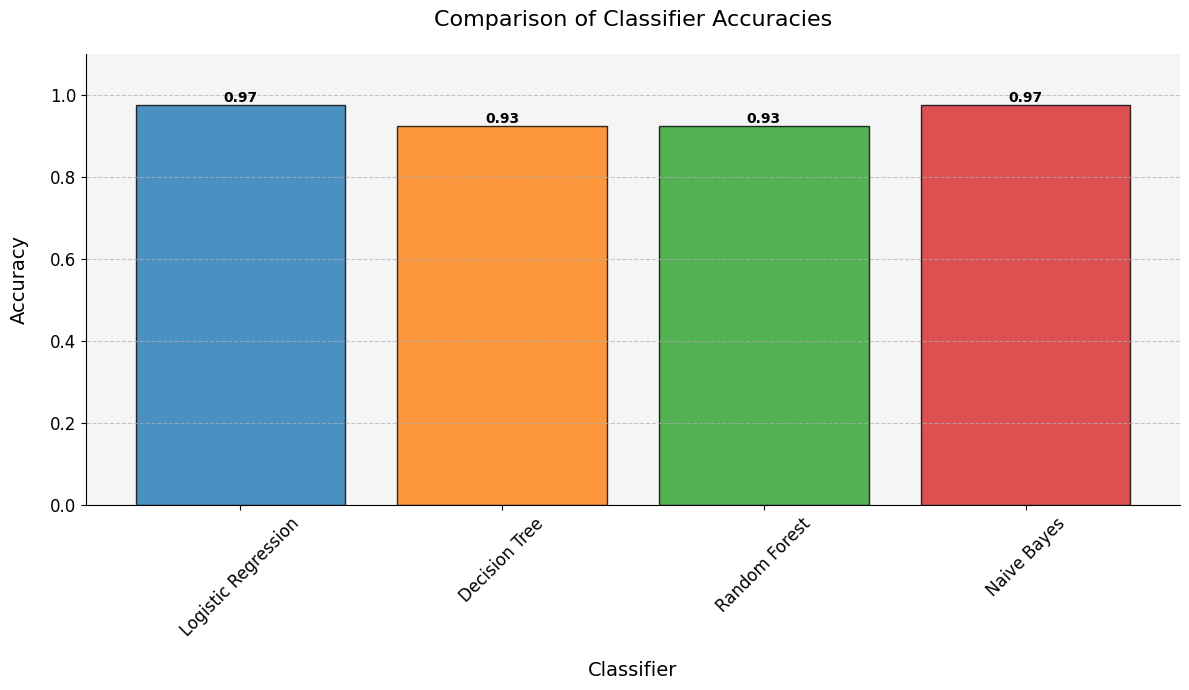

In [23]:
plt.figure(figsize=(12, 7))
bars = plt.bar(accuracies.keys(), accuracies.values(), color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'], alpha=0.8, edgecolor='black')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f"{yval:.2f}", va='bottom', ha='center', fontsize=10, fontweight='bold')

plt.xlabel('Classifier', fontsize=14, labelpad=15)
plt.ylabel('Accuracy', fontsize=14, labelpad=15)
plt.title('Comparison of Classifier Accuracies', fontsize=16, pad=20)
plt.ylim(0, 1.1)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().set_facecolor('#f5f5f5')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


# 1.4) Comparing the performance of these various supervised learning algorithm

<b>High Accuracy</b>: Both Logistic Regression and Naive Bayes had high accuracies (97.5%), indicating robust prediction performance and clusters that are well-defined and unique.

<b>Consistent Performance</b>: The Decision Tree and Random Forest classifiers also performed well (92.5%), supporting the idea that the clusters are meaningfully separated.

<b>Cluster Validation</b>: The consistency across methods demonstrates the clusters' homogeneity and sensitivity, indicating that k-means clustering using Manhattan distance successfully grouped comparable data points.

<b>Diverse Algorithms</b>: The clustering strategy is further validated by the variety of algorithms utilised, which range from linear models to ensemble approaches, as well as their similar success rates.

<b>Implication</b>: The clustering is expected to identify relevant trends in consumer behaviour, making the groupings suitable for focused study and decision-making.

 # Breast_cancer analysis with the sklearn library 

In [24]:
breast_cancer_data = load_breast_cancer()
X_bc = breast_cancer_data.data
y_bc = breast_cancer_data.target
scaler = StandardScaler()
X_bc_scaled = scaler.fit_transform(X_bc)

# 2.2 PCA with 2 components on the breast_cancer dataset

In [25]:
# Standardizing the data
scaler = StandardScaler()
X_bc_scaled = scaler.fit_transform(X_bc)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_bc_scaled)
X_pca.shape

(569, 2)

# 2.2 LDA with 1 component on the breast_cancer dataset

In [26]:
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X_bc_scaled, y_bc)
X_lda.shape

(569, 1)

# 2.3 Visualizing the components For PCA & For LDA

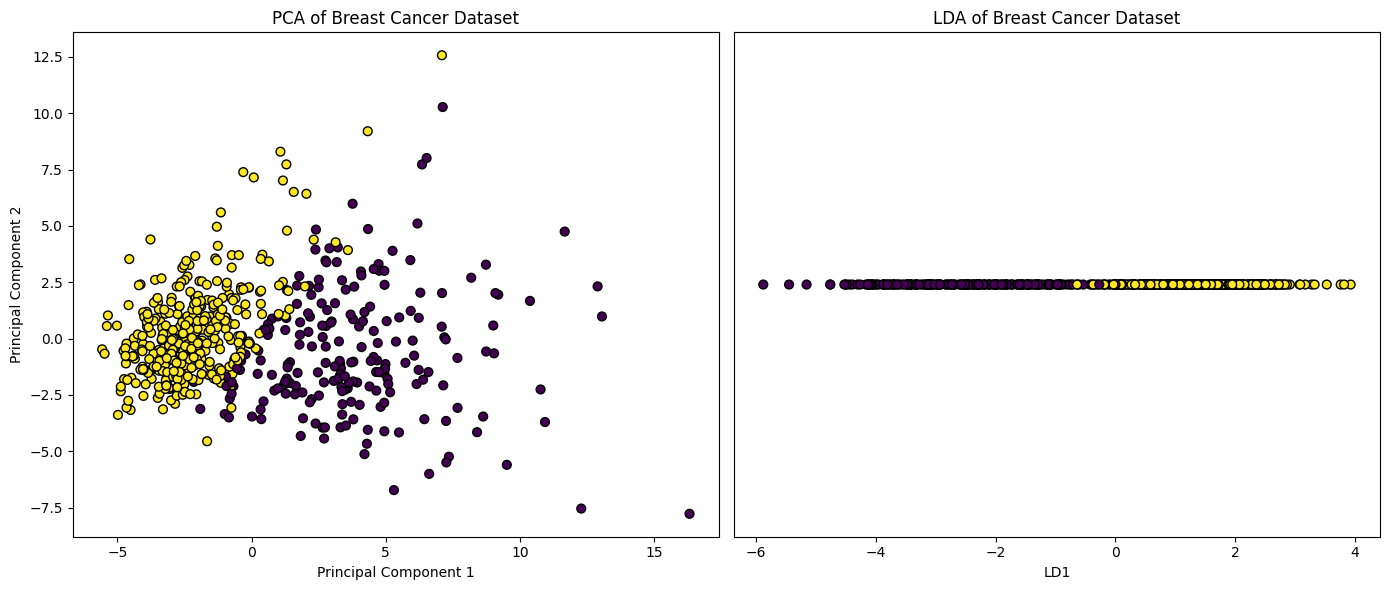

In [30]:
# PCA
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_bc, cmap='viridis', edgecolor='k', s=40)
plt.title('PCA of Breast Cancer Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

#  LDA
plt.subplot(1, 2, 2)
plt.scatter(X_lda[:, 0], [0] * len(X_lda), c=y_bc, cmap='viridis', edgecolor='k', s=40)
plt.title('LDA of Breast Cancer Dataset')
plt.xlabel('LD1')
plt.yticks([])
plt.tight_layout()
plt.show()

# 2.4 Maximum variance by PCA and LDA components

In [28]:
pca_variance = pca.explained_variance_ratio_
lda_variance = lda.explained_variance_ratio_
pca_variance, lda_variance

(array([0.44272026, 0.18971182]), array([1.]))

The components in PCA and LDA that explain the most variance are listed below:
PCA:
The first major component accounts for roughly 44.27 percent of the variation.
The second major component accounts for around 18.97% of the variation.
LDA:
The single linear discriminant component accounts for 100% of the variation in the direction that best distinguishes the classes.

# 2.5 Working

PCA and LDA provide opposing techniques to dimensionality reduction. PCA, an unsupervised technique, focuses on capturing the most variation without regard for class labels, which may not necessarily result in optimal class separation. LDA, a supervised approach that uses label information to maximise class distinction, has proven to be extremely successful in datasets such as breast cancer, where class differentiation is critical. In the breast cancer dataset, LDA beats PCA by directly using class labels to provide unambiguous separability between benign and malignant instances, making it the better choice for tasks that require precise class discrimination. This direct method to exploiting label information makes LDA ideal for improving classification performance.